Accuracy on training data: 0.7931596091205212
Accuracy on test data: 0.7597402597402597


c:\Users\Ramachandra\OneDrive\Desktop\6th sem miniproject\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


LIME Explanation:
[('Glucose <= -0.72', -0.33300688572735104), ('BMI <= -0.60', -0.18018037056312197), ('Pregnancies <= -0.86', -0.06280001362837347), ('-0.70 < DiabetesPedigreeFunction <= -0.29', -0.04112588632461861), ('Insulin <= -0.68', 0.03139061894810828)]


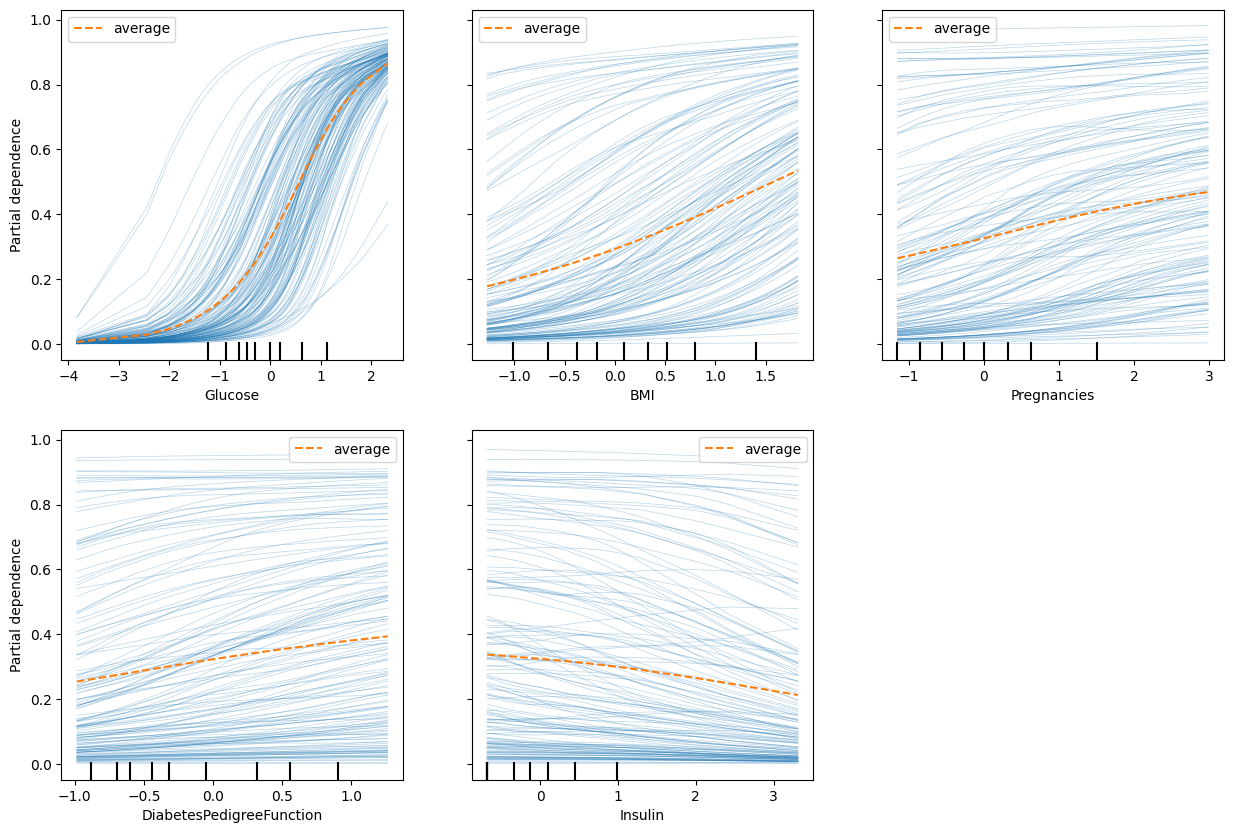

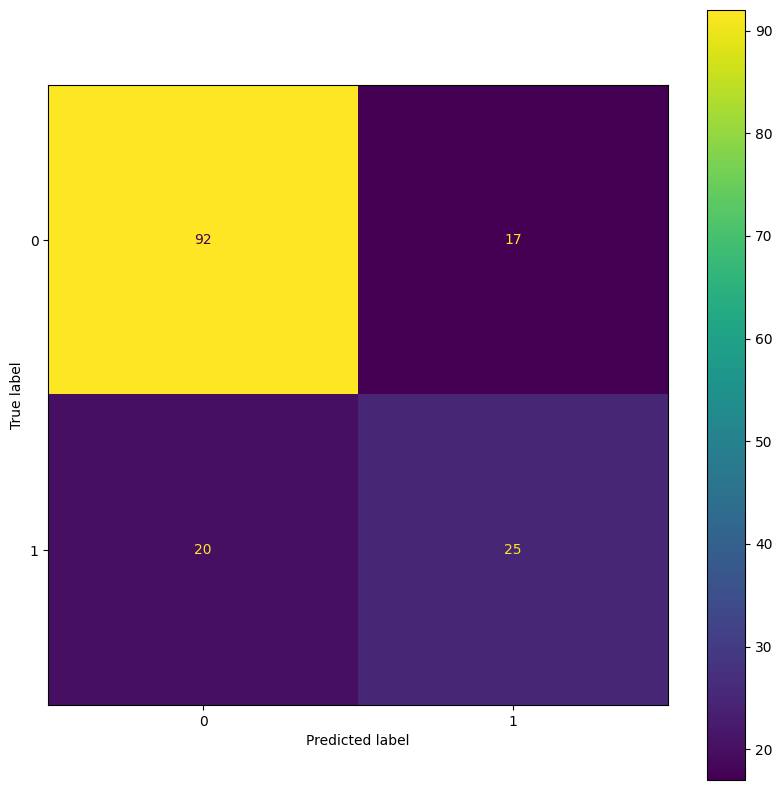

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_dataset = pd.read_csv(r"C:\Users\Ramachandra\OneDrive\Desktop\6th sem miniproject\diabetes (2).csv")

# Separate features and target variable
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust the MLP model with more layers and neurons
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(300, 200, 100, 50),  # Increased number of layers and neurons
    activation='relu',
    alpha=0.00035,
    solver='adam',
    learning_rate_init=0.001,
    max_iter=5000,
    random_state=2,
    early_stopping=True
)

# Train the MLP classifier
mlp_classifier.fit(X_train_scaled, Y_train)

# Model evaluation using accuracy score
train_accuracy = accuracy_score(Y_train, mlp_classifier.predict(X_train_scaled))
test_accuracy = accuracy_score(Y_test, mlp_classifier.predict(X_test_scaled))

print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)

# Save the best MLP model using pickle
filename = 'best_diabetes_mlp_model.sav'
pickle.dump(mlp_classifier, open(filename, 'wb'))

# Create a LimeTabularExplainer
explainer = LimeTabularExplainer(X_train_scaled, feature_names=X.columns.tolist(), class_names=['Non-Diabetic', 'Diabetic'], discretize_continuous=True)

# Example input data
input_data = np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

# Standardize the input data
input_data_scaled = scaler.transform(input_data)

# Generate explanations for a single instance
exp = explainer.explain_instance(input_data_scaled[0], mlp_classifier.predict_proba, num_features=5)

print('LIME Explanation:')
print(exp.as_list())
exp.show_in_notebook()

# PDP and ICE plots using sklearn.inspection
features_to_plot = [1,5,0,6,4]  # Indices of features to plot, adjust as necessary

# Plot PDP and ICE for selected features
fig, ax = plt.subplots(figsize=(15, 10))
display = PartialDependenceDisplay.from_estimator(
    mlp_classifier, 
    X_test_scaled, 
    features=features_to_plot, 
    feature_names=X.columns, 
    kind="both",  # plot both PDP and ICE
    ax=ax
)
plt.show()

# Plot confusion matrix
y_pred = mlp_classifier.predict(X_test_scaled)
cm = confusion_matrix(Y_test, y_pred, labels=mlp_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_classifier.classes_)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()
